# Đồ họa thống kê: Tối ưu hóa hiệu ứng tương phản

### BS. Lê Ngọc Khả Nhi

# Đặt vấn đề

Nhà văn Mỹ Herman Melville (1819-1891) từng phát biểu rằng: _"There is no quality in this world that is not what it is merely by contrast. Nothing exists in itself."_, đại ý: Mọi thứ trên thế gian đều không có “tự tính” nhưng được định nghĩa bằng sự tương phản với một thứ khác. Chúng ta hoàn toàn không nhận thức được những khái niệm như “Hơn/kém”, “tương đồng/khác biệt”, “Tốt/xấu” nếu không so sánh những vật thể với nhau. 

Tương tự, trong y học nhiều khái niệm như bệnh lý/bình thường, bệnh nhẹ/bệnh nặng, nguy cơ thấp/cao… được định nghĩa bằng tương phản và so sánh. Do thị giác mang lại lượng thông tin lớn nhất, nên so sánh trực quan dựa vào đồ họa thống kê có ý nghĩa quan trọng trong nghiên cứu y học, phục vụ cho nhiều mục tiêu như thăm dò dữ liệu, định hướng giả thuyết và trình bày kết quả. 

Hầu hết các bạn bác sĩ đều biết cách sử dụng loại biểu đồ phù hợp để so sánh dữ liệu giữa các phân nhóm; tuy nhiên trong một số hoàn cảnh, nội dung nguyên thủy của biểu đồ chưa thể hiện được sự tương phản tối ưu, hoặc tác giả cần nhấn mạnh một thông tin nào đó. Trong bài thực hành này, Nhi sẽ giới thiệu với các bạn một số thủ thuật đồ họa thống kê nhằm tăng cường hiệu ứng thị giác về sự tương phản. Nhi cũng sẽ triển khai những ý tưởng này bằng matplotlib và seaborn trong Python.

In [1]:
## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from itertools import product, combinations
import matplotlib.gridspec as plt_gs

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

import scipy

%config InlineBackend.figure_format = 'svg'

# Dữ liệu mô phỏng

Nhi viết hàm để tạo ra 1 bộ dữ liệu mô phỏng gồm 2 biến định lượng X1,X2 có phân phối chuẩn, thang đo từ 0-5 và được phân chia thành 4 cụm (phân nhóm), mỗi cụm gồm 200 đơn vị quan sát. 

In [2]:
def simulate_data(size=800, n_grp=4, std=0.7):
    
    import string
    
    X, y = make_blobs(n_samples=size,
                      centers=n_grp,
                      cluster_std=std,
                      random_state=333)
    
    X = MinMaxScaler().fit_transform(X)*5

    df = pd.DataFrame(np.hstack([X, y.reshape(X.shape[0], 1)]),
                      columns=['X1', 'X2', 'Group'])
    
    df['Group'] = df['Group'].map({k:v for k,v in zip(list(range(24)),
                                                      list(string.ascii_uppercase))})
    
    return df

In [21]:
df = simulate_data(size=800, n_grp=4, std=2)

df.head()

,X1,X2,Group
0,0.508803,1.290111,D
1,2.737935,3.642209,A
2,0.895759,0.930810,D
3,0.738508,2.258025,B
4,3.020474,0.960241,C


<AxesSubplot:xlabel='X1', ylabel='X2'>

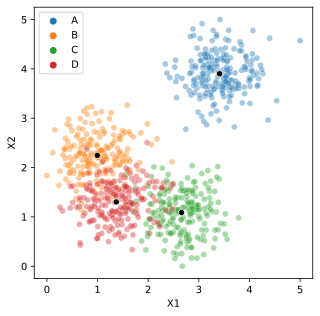

In [20]:
plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (5,5) # w,h

centers = df.groupby('Group').agg('mean')
                    
sns.scatterplot(data = df.sort_values('Group'), 
                x = 'X1', y = 'X2', 
                hue = 'Group', 
                alpha = 0.4)

sns.scatterplot(data = centers, 
                x = 'X1', y = 'X2',
                color = 'k')

# Các thủ thuật trình bày

## Chồng nhiều lớp biểu đồ lên nhau

Với mục tiêu so sánh giữa nhiều phân nhóm, ta có thể đặt nhiều lớp (layer) biểu đồ chồng lên nhau trên cùng thang đo và hệ tọa độ, lưu ý giảm giá trị alpha để tạo hiệu ứng trong suốt của mỗi lớp. 

Kỹ thuật này hoạt động tối ưu cho những lớp biểu đồ sử dụng diện tích để tạo hiệu ứng tương phản, thí dụ: Kernel density plot.

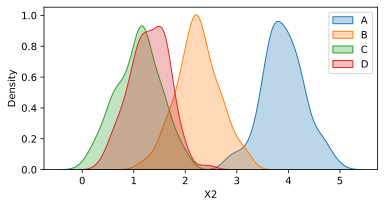

In [22]:
plt.rcParams["figure.figsize"] = (6,3) # w,h

for g in list('ABCD'):
    
    idf = df[df['Group'] == g]
    sns.kdeplot(idf['X2'], shade = True, alpha = 0.3, label = g)

plt.legend()
plt.show()

## Tách biệt và song song

Một thủ thuật khác, đó là tách mỗi phân nhóm thành một biểu đồ (panel) riêng biệt, và sắp xếp những panels này song song với nhau trên cùng thang đo/trục tọa độ của đại lượng cần so sánh.

Một số loại biểu đồ như boxplot, barplot... dựa trên cơ chế này ngay từ đầu, tuy nhiên trong một vài trường hợp việc phân chia này do ta chủ động thực hiện, thí dụ cho biểu đồ tuyến kí:

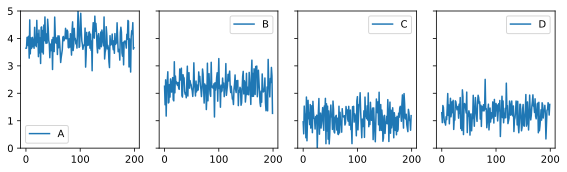

In [25]:
fig, axes = plt.subplots(1,4, figsize = (8,2.5), sharey=True)

for g,ax in zip(list('ABCD'),axes.flatten()):
    filt_df = df[df['Group'] == g]
    filt_df.reset_index(inplace=True, drop = True)
    ax.plot(filt_df.index, filt_df['X2'], label = g)
    ax.set_ylim(0,5)
    ax.legend()

plt.tight_layout()
plt.show()

Nhận xét: Tách biệt nhiều biểu đồ kém hiệu quả hơn so với chồng lắp chúng lên nhau. Ta nên tuân thủ nguyên tắc: trình bày mật độ thông tin cao nhất có thể trên cùng một diện tích và hơn nữa: việc so sánh nên diễn ra trên những thứ nằm trong tầm mắt. Sự sắp xếp tách biệt, dù song song hay kề cận nhau sẽ gây bất lợi cho việc so sánh vì phải vận dụng trí nhớ ngắn hạn của con người. Tuy nhiên, khi có quá nhiều phân nhóm cần so sánh thì việc chồng lắp layers lại tạo ra rác gây nhiễu.

## Sử dụng màu sắc tương phản

Ta có thể sử dụng các màu sắc tương phản cao (thí dụ xanh/đỏ, cam/tím, đỏ/đen) để làm nổi bật một phân nhóm cần quan tâm so với những phân nhóm còn lại. Cách làm này có thể áp dụng cho mọi thành phần hình họa : hộp chữ nhật, điểm tròn, đoạn thẳng, đa giác và đường cong. 

Thí dụ ta muốn làm nổi bật phân nhóm B so với 3 phân nhóm còn lại:

### Biểu đồ tán xạ

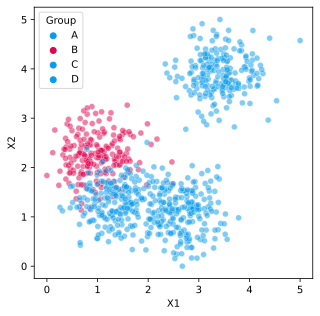

In [29]:
my_pal = ['#079beb', '#e3004c', '#079beb', '#079beb']

plt.rcParams["figure.figsize"] = (5,5) # w,h

sns.scatterplot(data = df.sort_values('Group'), 
                x = 'X1', y = 'X2', 
                hue = 'Group', 
                alpha = 0.5,
                palette = sns.color_palette(my_pal).as_hex())

plt.show()

### Biểu đồ mật độ phân phối

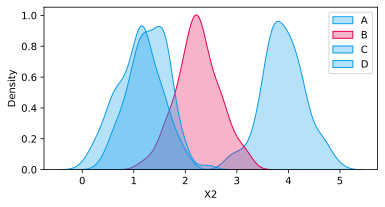

In [30]:
plt.rcParams["figure.figsize"] = (6,3) # w,h

for g,c in zip(list('ABCD'), my_pal):
    
    idf = df[df['Group'] == g]
    sns.kdeplot(idf['X2'], color = c, shade = True, alpha = 0.3, label = g)

plt.legend()
plt.show()

### Biểu đồ tuyến kí

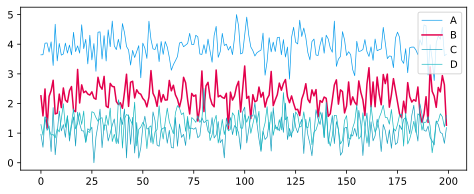

In [32]:
my_pal = ['#079beb', '#e3004c', '#17a0bf', '#17b7bf']

plt.rcParams["figure.figsize"] = (8,3) 

for g,s,c in zip(list('ABCD'),[0.7,1.5,0.7,0.7], my_pal):
    idf = df[df['Group'] == g]
    idf.reset_index(drop = True, inplace = True)
    plt.plot(idf.index, idf['X2'], color = c, lw = s, label = g)

plt.legend()
plt.show()

### Biểu đồ cột

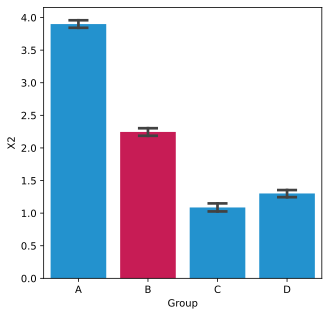

In [38]:
plt.rcParams["figure.figsize"] = (5,5) # w,h

my_pal = ['#079beb', '#e3004c', '#079beb', '#079beb']

ax = sns.barplot(x="Group", 
                 y="X2", 
                 palette = sns.color_palette(my_pal).as_hex(),
                 data=df.sort_values('Group'), 
                 capsize=.25)
    
plt.show()

### Biểu đồ hộp

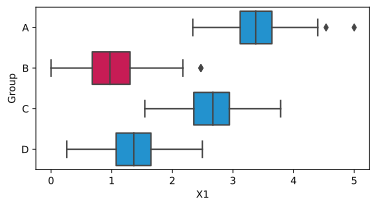

In [39]:
plt.rcParams["figure.figsize"] = (6,3) # w,h

ax = sns.boxplot(y="Group", 
                 x="X1", 
                 palette = sns.color_palette(my_pal).as_hex(),
                 data=df.sort_values('Group'))

## Trọng số tương phản cho yếu tố hình họa

Ta có thể làm nổi bật sự tương phản, gây tập trung sự chú ý vào một phân nhóm bằng cách áp dụng trọng số cho một yếu tố hình họa, như: độ dày của nét vẽ (biểu đồ tuyến kí), chiều rộng của hình hộp (bargraph), diện tích của điểm tròn...

### Diện tích điểm tròn

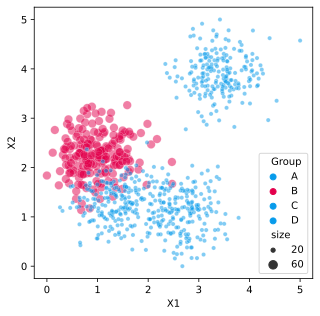

In [42]:
idf = df.copy()
idf['size'] = idf['Group'].map({'A':20, 'B':60, 'C':20, 'D':20})

plt.rcParams["figure.figsize"] = (5,5) # w,h

sns.scatterplot(data = idf.sort_values('Group'), 
                x = 'X1', y = 'X2', 
                hue = 'Group',
                alpha = 0.5,
                size = 'size',
                palette = sns.color_palette(my_pal).as_hex())

plt.show()

### Độ dày nét vẽ

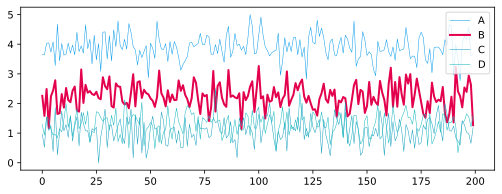

In [47]:
plt.rcParams["figure.figsize"] = (8.5,3) # w,h
my_pal = ['#079beb', '#e3004c', '#17a0bf', '#17b7bf']

for g,s,c in zip(list('ABCD'),[0.5,2,0.5,0.5], my_pal):
    idf = df[df['Group'] == g]
    idf.reset_index(drop = True, inplace = True)
    plt.plot(idf.index, idf['X2'], color = c, lw = s, label = g)

plt.legend()
plt.show()

### Chiều rộng biểu đồ cột

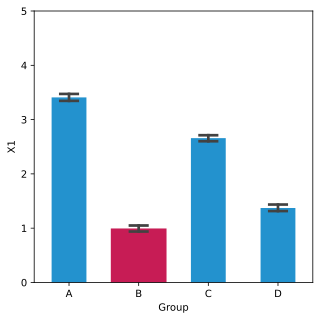

In [48]:
my_pal = ['#079beb', '#e3004c', '#079beb', '#079beb']

plt.rcParams["figure.figsize"] = (5,5) # w,h

ax = sns.barplot(x="Group", 
                 y="X1", 
                 palette = sns.color_palette(my_pal).as_hex(),
                 data=df.sort_values('Group'), 
                 capsize=.25)

for bar,newwidth in zip(ax.patches,[0.5,0.8,0.5,0.5]):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2

    bar.set_x(centre-newwidth/2)
    bar.set_width(newwidth)
    
ax.set_ylim(0,5)
plt.show()

## Sử dụng kí hiệu tương phản

Một thủ thuật tương tự đó là dùng những kí hiệu/nét vẽ để tạo ra hiệu ứng tương phản, thí dụ nét liền/gián đoạn cho biểu đồ tuyến kí, hình dạng của điểm cho biểu đồ tán xạ...

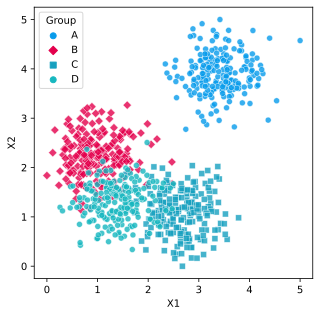

In [50]:
markers = {'A':'o','B':'D','C':'s','D':'o'}
my_pal = ['#079beb', '#e3004c', '#17a0bf', '#17b7bf']

plt.rcParams["figure.figsize"] = (5,5) # w,h

sns.scatterplot(data = df.sort_values('Group'), 
                x = 'X1', y = 'X2', 
                hue = 'Group',
                alpha = 0.8,
                style="Group", markers=markers,
                palette = sns.color_palette(my_pal).as_hex())

plt.show()

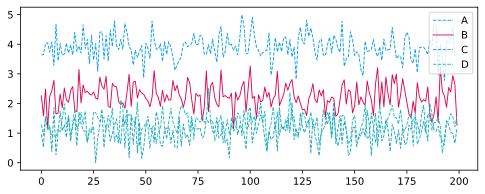

In [53]:
plt.rcParams["figure.figsize"] = (8.2,3) # w,h

for g,s,c in zip(list('ABCD'),['--','-','--','--'], my_pal):
    idf = df[df['Group'] == g]
    idf.reset_index(drop = True, inplace = True)
    plt.plot(idf.index, idf['X2'], s, color = c, lw = 0.9, label = g)

plt.legend()
plt.show()

# Tổng kết

So sánh là một hành vi thường trực và vô thức. Chúng ta cảm nhận được sự khác biệt/tương phản giữa vật thể này với vật thể khác nhờ vào nhiều yếu tố như kích thước/khoảng cách, diện tích, phương hướng/góc và màu sắc. Mỗi loại hình họa có hiệu quả tương phản cao thấp khác nhau: Hiệu ứng tốt nhất là khoảng cách/tọa độ, kém nhất là diện tích hoặc màu sắc. Do đó, việc so sánh sẽ dễ dàng hơn trên biểu đồ tuyến kí so với bản đồ, biểu đồ thanh tốt hơn biểu đồ bánh, biểu đồ tán xạ tốt hơn biểu đồ thanh hoặc boxplot... Tuy nhiên ta có thể chủ động can thiệp bằng một số thủ thuật trên các yếu tố hình họa/màu sắc để tối ưu hóa hiệu ứng tương phản tùy vào mục tiêu và hoàn cảnh.